# Part 7: Advanced topics on gradient descent

In [10]:
import importlib

import numpy as np # linear algebra
import pandas as pd #dataframe library
import sklearn # machine learning library
assert sklearn.__version__ >= '0.2'
from sklearn import datasets
import random
np.random.seed(seed=42) # to have same results each time
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import useful_functions
importlib.reload(useful_functions)
from useful_functions import generate_dataset, unison_shuffled_copies, get_train_test_datasets, gradient_descent, gradient_descent_with_momentum, plot_convergence_rate,plot_convergence_rate_with_momentum, plot_evolution_on_test_error, plot_evolution_on_test_error_with_bias


### Question 1: For the objective of Question 2, Part 1, implement Heavy Ball. Try several momentum parameters and stepsizes, and find the best ones.

In [11]:
#% of rows to include in training dataset
TRAINING_RATIO = 0.75

dataset = sklearn.datasets.fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)
A = dataset['data']
Y = dataset['target']
A_shuffled, Y_shuffled = unison_shuffled_copies(A, Y)
A_train, Y_train, A_test, Y_test = get_train_test_datasets(A_shuffled, Y_shuffled,TRAINING_RATIO)

The Heavy Ball is the simplest version of gradient descent with momentum. In that case, the momentum and stepsize parameters are constant. When we apply it to our problem we get an algotithm that converges fastly (but the increases with respect to classic GD is not visible at the naked eye) and to the same value as GD. 

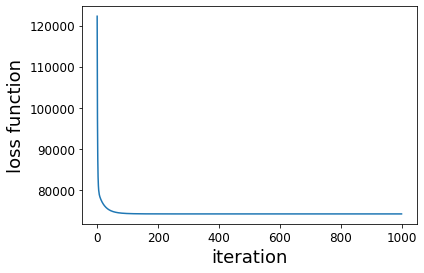

In [12]:
nb_of_iterations = 1000
step_size = 1e-5
gamma = 0.2

iteration, loss_function_array = gradient_descent_with_momentum(A_train, Y_train, nb_of_iterations, step_size, gamma)
plt.plot(iteration, loss_function_array)   
plt.xlabel("iteration", rotation=0, fontsize=18)
plt.ylabel("loss function", rotation=90, fontsize=18)
plt.show()

We already know the optimal step size as we find it in part1 question 3, so here we just optimize on momentum parameter. From the previous plot it seems, that the optimal value is 0.8 which means we give more credit to the aggragtion of previous iteration than the last one.
Still let's not that the difference betweenn all values is rather thin, so here hyper-parameter optimization is not as important as in others configurations (but remains a crucial part).

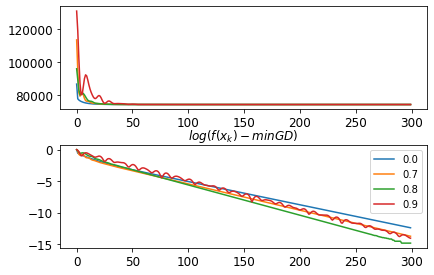

In [13]:
niter = 300
step_size = 3e-5
plot_convergence_rate_with_momentum(A_train,Y_train, niter, step_size)

### Question 2: With these parameters, how does Heavy Ball compare with gradient descent?


GD correspond to the case where the momentum is 0 (blue curve). So if we compare blue and green curve, that in the end they converge to the same value (around 80,000).
Besides, we see that at the beggining the blue seems to converge faster. However after a couple hundred iteration the green is faster. This is precisely the aim of Heavy Ball: having a method that converges faster than GD, especially in the case of anistropy. 

### Question 3: Propose a non-convex loss function for your regression or classification problem (for instance, you can add a non-convex penalty to your convex objective, like the p-norm for 0<p<1, or you can try prediction with a multilayer perceptron, as here). Try minimizing the loss with gradient descent, and check that you reach at least an approximate first-order approximate critical point. Do you get good prediction results?

In [14]:
def grad_non_convex_term(x,p):
    '''
    Calculate the gradient for Lp norm with x convex 
    '''
    dim = len(x)
    value = np.linalg.norm(x, ord=p)
    grad = np.zeros(dim)
    for d in range(dim):
        grad[d] =  np.sign(x[d])*(np.abs(x[d])/value)**(p-1)
    return grad 

We add a non-convex penalty by incorporating in our problem a Lp norm on $x$ with $p=\frac{1}{2}$.
As the problem is not convex we don't have similar guarantees to converge towards global minima. However we have guarantees that this method converges towards 1st order critical point, that is to say point where the gradient is null. Indeed, when we check gradient value at the end, all coordinates are closed to 0. 

Besides, in our case it seems that adding a non-convex penalty doesn't alter the value of the loss convergence.

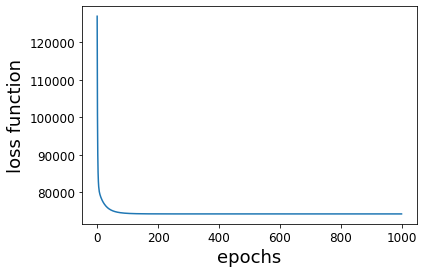

Optimal parameter is:
[ 0.84247909  0.11843845 -0.27779122  0.29741334 -0.00659856 -0.04489949
 -0.88613279 -0.85998167]


In [15]:
#GD implementation non convex loss
n_epochs = 1000
step_size = 1e-5
lbda = 1
p = 0.5 #0<p<1 for non convex term
D = A_train.shape[1] # dimension of pbm 
x = np.random.rand(D) # random initialization

loss_function_array = []
epochs = []

for epoch in range(n_epochs):
    #here only one iteration per epoch
    epochs.append(epoch)
    
    loss_function_train = np.linalg.norm(np.dot(A_train,x)-Y_train)**2 + lbda*np.linalg.norm(x, ord=p) # add non convex reg
    loss_function_array.append(loss_function_train)
    
    gradients = 2*A_train.T.dot(np.dot(A_train,x)-Y_train) + lbda*grad_non_convex_term(x,p)
    x = x-step_size*gradients

plt.plot(epochs, loss_function_array)   
plt.xlabel("epochs", rotation=0, fontsize=18)
plt.ylabel("loss function", rotation=90, fontsize=18)
plt.show()
print("Optimal parameter is:")
print(x)

In [17]:
#gradient converges towars 0
print('The last value of gradient is:')
print(gradients)

The last value of gradient is:
[ 5.20359715e-04  9.74128620e-05 -8.99257822e-04  7.15295852e-04
  3.16161040e-05 -3.03154830e-05  1.25114526e-03  1.19082381e-03]
